In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd
import anndata

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from sklearn.neighbors import NearestNeighbors


Set parameters

In [2]:
neighbors = 15

colors = {"DCT": "#800515",
               "Endothelium": "#7ae031",
               "UB_CT": "black",
               "Podocyte": "#ad9c00", 
               "Stroma": "#794b82",
               "NPC": "#ff8000", 
               "PT": "#ff00d4", 
               "Int": "#698cff",
               "Ureth": "#d47222", 
               "PEC": "#ff0011", 
               "LOH": "#235e00",
               "Immune Cells": '#757575',
         }

In [3]:
adata_allSCRNA = sc.read_h5ad("/home/levinsj/Fetal_dir/CellBenderCorrected/04_annotated/cellSubsets/FetalNephronAndUB_annotated_final.h5ad")



In [4]:
absorbtion_prob = pd.read_csv("/home/levinsj/Fetal_dir/Velocyto/03_CellRank/specification_absorbtion_probabilities.csv")
selection_prob = pd.read_csv("/home/levinsj/Fetal_dir/Velocyto/03_CellRank/selection_absorbtion_probabilities.csv")
selfRenew_prob = pd.read_csv("/home/levinsj/Fetal_dir/Velocyto/03_CellRank/reNew_absorbtion_probabilities.csv")
pseudoTime_prob = pd.read_csv('/home/levinsj/Fetal_dir/Velocyto/03_CellRank/pseudoTime.csv')

absProbs = pd.concat([absorbtion_prob, selection_prob, selfRenew_prob, pseudoTime_prob], axis=1)
print(absProbs)


cellRankadata = sc.read_h5ad("/home/levinsj/Fetal_dir/Velocyto/03_CellRank/NephroLineage_40_30_clean.h5ad")
absProbs.index = cellRankadata.obs.index

#adata_nephron.obs["PEC_absorbtion"] = absProbs["PEC"]
adata_allSCRNA.obs["DCT_absorbtion"] = absProbs["DCT"]

            DCT       LOH        PT  Podocyte  Glomerular    Tubule  \
0      0.066327  0.817555  0.002761  0.113354    0.113354  0.886646   
1      0.060467  0.029801  0.135102  0.774614    0.774614  0.225382   
2      0.117577  0.692397  0.003307  0.186715    0.186715  0.813284   
3      0.220215  0.083260  0.036456  0.660053    0.660053  0.339942   
4      0.053569  0.026272  0.024683  0.895458    0.895458  0.104537   
...         ...       ...       ...       ...         ...       ...   
41163  0.025190  0.011880  0.002593  0.960316    0.960316  0.039678   
41164  0.015814  0.011535  0.046595  0.926036    0.926036  0.073959   
41165  0.219231  0.102607  0.046527  0.631622    0.631622  0.368374   
41166  0.000000  0.000000  1.000000  0.000000    0.000000  1.000000   
41167  0.014774  0.010944  0.002495  0.971766    0.971766  0.028228   

       Differentiated Cell       NPC  PseudoTime  LatentTime  
0                 0.998578  0.001418    0.296976    0.440005  
1                 0.9

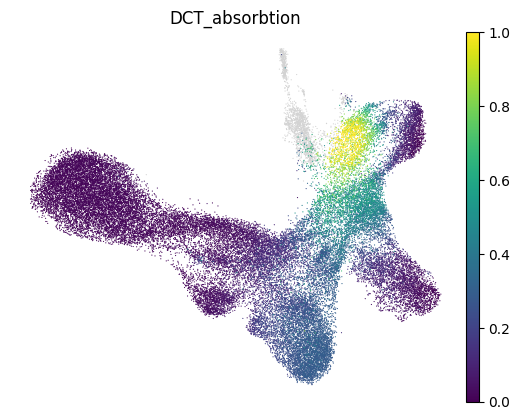

In [5]:
sc.pl.umap(adata_allSCRNA, color = ["DCT_absorbtion"], cmap = "viridis", frameon = False)